# Working with personal data requests


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Your task

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.


### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup.

For PDFs, you might need to use a tool like [Tabula](https://pypi.org/project/tabula-py/) (a Java tool, which runs in a Python wrapper) to extract the text from the PDF into a table format. _(Note: To use it, I had to install/update Java, and then install the Tabula package! A bit annoying, but not too bad...)_ Once I did that, though, it was fairly easy to run.

If you are having issues getting Tabula installed on your machine:
* make sure you try following the installation instructions [here](https://pypi.org/project/tabula-py/)
* you can also try running it in a Google Colab notebook, example [here](https://colab.research.google.com/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb)



## Part 0: Setting up a GitHub repository
#### Link: https://github.com/audreymarthin/Proj8_CS215_Audrey_Ruth

## Part 1: Extracting timestamps from your personal data

In [2]:
spotify = pd.read_json("StreamingHistory0.json")
spotify

,endTime,artistName,trackName,msPlayed
0,2022-10-18 01:12,One Direction,Illusion,194200
1,2022-10-18 01:15,One Direction,Does He Know?,179413
2,2022-10-18 01:19,One Direction,Story of My Life,245493
3,2022-10-18 01:23,One Direction,Story of My Life,245493
4,2022-10-18 16:58,One Direction,Fireproof,174080
...,...,...,...,...
9995,2023-04-04 05:17,Nadin Amizah,Bertaut,260076
9996,2023-04-04 05:20,Kim Na Young,There For You,180235
9997,2023-04-04 05:33,D’MASIV,Jangan Menyerah,777023
9998,2023-04-04 05:36,Loving Caliber,I Wish You Were Mine,14140


In [3]:
spotify2 = pd.read_json("StreamingHistory1.json")
spotify2

,endTime,artistName,trackName,msPlayed
0,2023-04-04 15:50,Feby Putri,Runtuh,250236
1,2023-04-04 15:50,JJ Lin,Bedroom (feat. Anne-Marie),13443
2,2023-04-04 16:09,Mahalini,Sisa Rasa,254863
3,2023-04-04 16:12,Keenan Te,Dependent,198320
4,2023-04-04 16:16,Jamie Miller,I Lost Myself In Loving You,256288
...,...,...,...,...
9954,2023-10-18 19:42,Niall Horan,If You Leave Me,42144
9955,2023-10-18 19:42,Niall Horan,Heaven,65526
9956,2023-10-18 19:45,Jonah Kagen,broken,195400
9957,2023-10-18 19:48,Tate McRae,you broke me first,169265


In [4]:
all_spotify = [spotify, spotify2]
spotify_data = pd.concat(all_spotify)
spotify_data

,endTime,artistName,trackName,msPlayed
0,2022-10-18 01:12,One Direction,Illusion,194200
1,2022-10-18 01:15,One Direction,Does He Know?,179413
2,2022-10-18 01:19,One Direction,Story of My Life,245493
3,2022-10-18 01:23,One Direction,Story of My Life,245493
4,2022-10-18 16:58,One Direction,Fireproof,174080
...,...,...,...,...
9954,2023-10-18 19:42,Niall Horan,If You Leave Me,42144
9955,2023-10-18 19:42,Niall Horan,Heaven,65526
9956,2023-10-18 19:45,Jonah Kagen,broken,195400
9957,2023-10-18 19:48,Tate McRae,you broke me first,169265


In [45]:
# Export dataframe (containing timestamps) using .to_csv
spotify_data["endTime"].to_csv("audrey_timestamps.csv")
spotify_timestamps = pd.read_csv("audrey_timestamps.csv")
spotify_timestamps

,Unnamed: 0,endTime
0,0,2022-10-18 01:12:00
1,1,2022-10-18 01:15:00
2,2,2022-10-18 01:19:00
3,3,2022-10-18 01:23:00
4,4,2022-10-18 16:58:00
...,...,...
19954,19954,2023-10-18 19:42:00
19955,19955,2023-10-18 19:42:00
19956,19956,2023-10-18 19:45:00
19957,19957,2023-10-18 19:48:00


In [6]:
# Read CSV
audrey = pd.read_csv("audrey_timestamps.csv")

# Convert to datetime and sort
audrey["endTime"] = pd.to_datetime(audrey["endTime"])
audrey.sort_values(by="endTime")

# Examine
audrey

,Unnamed: 0,endTime
0,0,2022-10-18 01:12:00
1,1,2022-10-18 01:15:00
2,2,2022-10-18 01:19:00
3,3,2022-10-18 01:23:00
4,4,2022-10-18 16:58:00
...,...,...
19954,9954,2023-10-18 19:42:00
19955,9955,2023-10-18 19:42:00
19956,9956,2023-10-18 19:45:00
19957,9957,2023-10-18 19:48:00


In [7]:
# Convert to csv
audrey["endTime"].to_csv("audrey_timestamps.csv")

## Part 2: Analyzing timestamp data for patterns

In [8]:
# Read CSV
ruth = pd.read_csv("Ruth_timestamps.csv")

# Convert to datetime and sort
ruth["ts"] = pd.to_datetime(ruth["ts"])
ruth.sort_values(by="ts")

# Examine
ruth

,Unnamed: 0,ts
0,0,2023-06-19 02:58:03
1,1,2023-06-19 03:03:32
2,2,2023-06-19 03:10:21
3,3,2023-06-19 03:47:41
4,4,2023-06-19 03:54:56
...,...,...
12518,12518,2023-10-26 23:45:12
12519,12519,2023-10-26 23:47:49
12520,12520,2023-10-26 23:48:28
12521,12521,2023-10-26 23:49:15


In [9]:
# Format the datetime without the timezone offset
ruth["ts"] = pd.to_datetime(ruth["ts"].dt.strftime("%Y-%m-%d %H:%M:%S")) # the original data had a different ts format
ruth["ts"].to_csv("Ruth_timestamps.csv")
ruth

,Unnamed: 0,ts
0,0,2023-06-19 02:58:03
1,1,2023-06-19 03:03:32
2,2,2023-06-19 03:10:21
3,3,2023-06-19 03:47:41
4,4,2023-06-19 03:54:56
...,...,...
12518,12518,2023-10-26 23:45:12
12519,12519,2023-10-26 23:47:49
12520,12520,2023-10-26 23:48:28
12521,12521,2023-10-26 23:49:15


In [10]:
# Look at time difference
ruth["timeDifference"] = ruth["ts"].diff()
ruth

,Unnamed: 0,ts,timeDifference
0,0,2023-06-19 02:58:03,NaT
1,1,2023-06-19 03:03:32,0 days 00:05:29
2,2,2023-06-19 03:10:21,0 days 00:06:49
3,3,2023-06-19 03:47:41,0 days 00:37:20
4,4,2023-06-19 03:54:56,0 days 00:07:15
...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26
12519,12519,2023-10-26 23:47:49,0 days 00:02:37
12520,12520,2023-10-26 23:48:28,0 days 00:00:39
12521,12521,2023-10-26 23:49:15,0 days 00:00:47


#### I. What is the longest time between timestamps? What is the average time between timestamps?

In [11]:
# Utilize max and mean

r_longest = ruth["timeDifference"].max()
r_mean = ruth["timeDifference"].mean()
print("The longest time between timestamps for Ruth is {} and the average time between timestamps is {}".format(r_longest, r_mean))

The longest time between timestamps for Ruth is 2 days 18:20:10 and the average time between timestamps is 0 days 00:14:56.076744928


#### II. What is the day with the most timestamps? How many events (timestamps) were on that day? 

In [12]:
# Have date column
ruth["date"] = pd.DatetimeIndex(ruth["ts"]).date 
ruth


,Unnamed: 0,ts,timeDifference,date
0,0,2023-06-19 02:58:03,NaT,2023-06-19
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19
...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26


In [13]:
# Count the occurrences of each date and examine
r_date_counts = ruth["date"].value_counts()
r_date_counts


date
2023-09-06    730
2023-08-03    416
2023-08-02    386
2023-09-08    362
2023-10-19    316
             ... 
2023-07-30      7
2023-06-21      4
2023-08-25      3
2023-10-08      2
2023-07-03      2
Name: count, Length: 125, dtype: int64

In [14]:
# Now create column for ts count
# Group by 'date' and count occurrences of 'ts' per date
ruth["ts_count_per_date"] = ruth.groupby("date")["ts"].transform("count")
ruth

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,15
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,15
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,15
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,15
...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37


In [15]:
# Get the date with the most timestamps and the corresponding count
r_most_ts_date = ruth["ts_count_per_date"].idxmax()
r_date_ts_count = ruth["ts_count_per_date"].max()
most_ts_date = ruth.loc[r_most_ts_date, "date"]
print("The day with the most timestamps for Ruth's data is {} with {} events (timestamps) on this day.".format(most_ts_date, r_date_ts_count))

The day with the most timestamps for Ruth's data is 2023-09-06 with 730 events (timestamps) on this day.


#### III. What is the month with the most timestamps? How many events (timestamps) were on that month?

In [16]:
# Have month column
ruth["month"] = pd.DatetimeIndex(ruth["ts"]).month
ruth 

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,15,6
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,15,6
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,15,6
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,15,6
...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10


In [17]:
# Count the occurrences of each month and examine
r_month_counts = ruth["month"].value_counts()
r_month_counts


month
9     4218
10    2852
8     2683
7     2322
6      448
Name: count, dtype: int64

In [18]:
# Now create column for ts count
# Group by 'month' and count occurrences of 'ts'
ruth["ts_count_per_month"] = ruth.groupby("month")["ts"].transform("count")
ruth

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,15,6,448
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,15,6,448
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,15,6,448
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,15,6,448
...,...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10,2852
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10,2852
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10,2852
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10,2852


In [19]:
# Get the month with the most timestamps and the corresponding count
r_most_ts_month = ruth["ts_count_per_month"].idxmax()
r_month_ts_count = ruth["ts_count_per_month"].max()
most_ts_month = ruth.loc[r_most_ts_month, "month"]
print("The month with the most timestamps for Ruth's data is {} with {} events (timestamps) on this month.".format(most_ts_month, r_month_ts_count))

The month with the most timestamps for Ruth's data is 9 with 4218 events (timestamps) on this month.


#### IV. Data Visualization

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


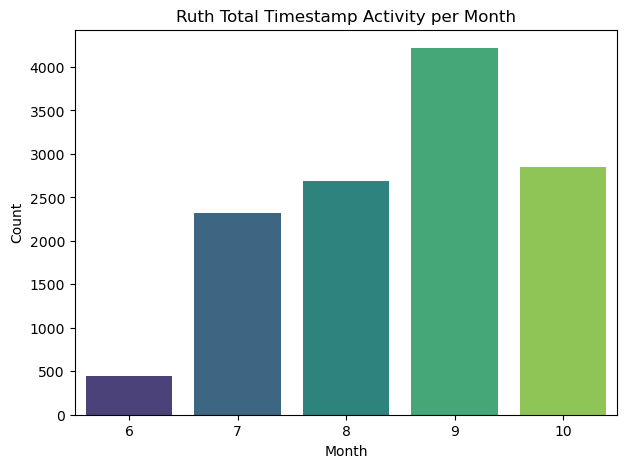

In [20]:
# Visualize ts activity trend per month
plt.figure(figsize=(7, 5))
sns.barplot(x="month", y="ts_count_per_month", data=ruth, palette="viridis")
plt.title("Ruth Total Timestamp Activity per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

We can see that in month 9 there is peak timestamp activity whereas month 6 had the lowest data. However, it's important to note that Ruth's data started on 2023-06-19, which is in the middle of month 6 which explains the lack of data compared to the other months.

In [21]:
# Extract the day of the week from the timestamp
ruth["day_of_week"] = ruth["ts"].dt.day_name()

# Count the number of events for each day of the week
r_day_counts = ruth["day_of_week"].value_counts()

# Order the days of the week
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
r_day_counts = r_day_counts.reindex(days_order)
r_day_counts


day_of_week
Monday       1270
Tuesday      2089
Wednesday    2393
Thursday     2288
Friday       1689
Saturday     1833
Sunday        961
Name: count, dtype: int64

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


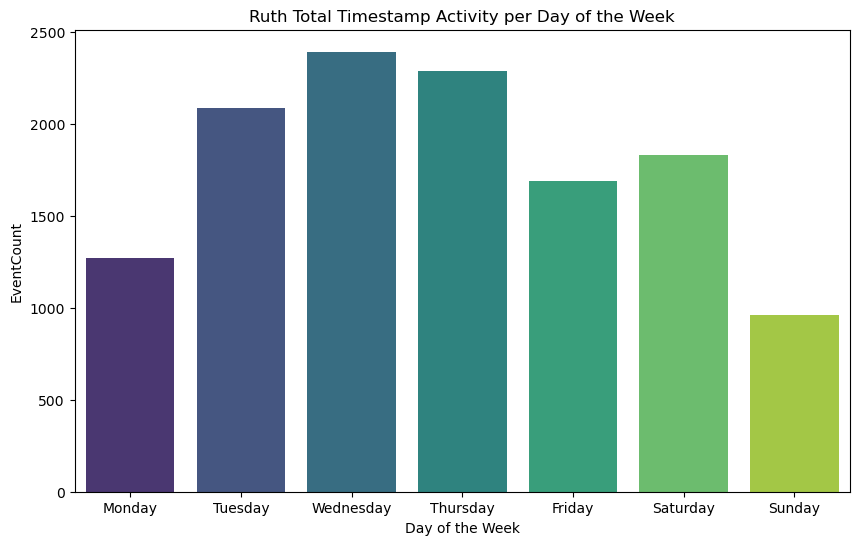

In [22]:
# Visualize ts activity trend per day of week
plt.figure(figsize=(10, 6))
sns.barplot(x=r_day_counts.index, y=r_day_counts.values, palette="viridis")
plt.title("Ruth Total Timestamp Activity per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("EventCount")
plt.show()

We can observe Ruth has the most timestamp data taken on Wednesday, whereas Sunday has the least timestamp data. So it can be inferred that peak timestamp activity happens during the middle of the week.

In [23]:
# Extract the hour from the timestamp
ruth["hour"] = ruth["ts"].dt.hour

# Create column for ts count
# Group by 'hour' and count occurrences of 'ts'
ruth["ts_count_per_hour"] = ruth.groupby(["date", "hour"])["ts"].transform("count")

# Calculate the mean ts_count_per_hour for each unique hour
hourly_mean = ruth.groupby("hour")["ts_count_per_hour"].mean().reset_index()
hourly_mean


,hour,ts_count_per_hour
0,0,54.438975
1,1,40.133612
2,2,25.070404
3,3,55.812983
4,4,88.324786
5,5,77.103718
6,6,49.430859
7,7,45.863436
8,8,24.435897
9,9,30.136364


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

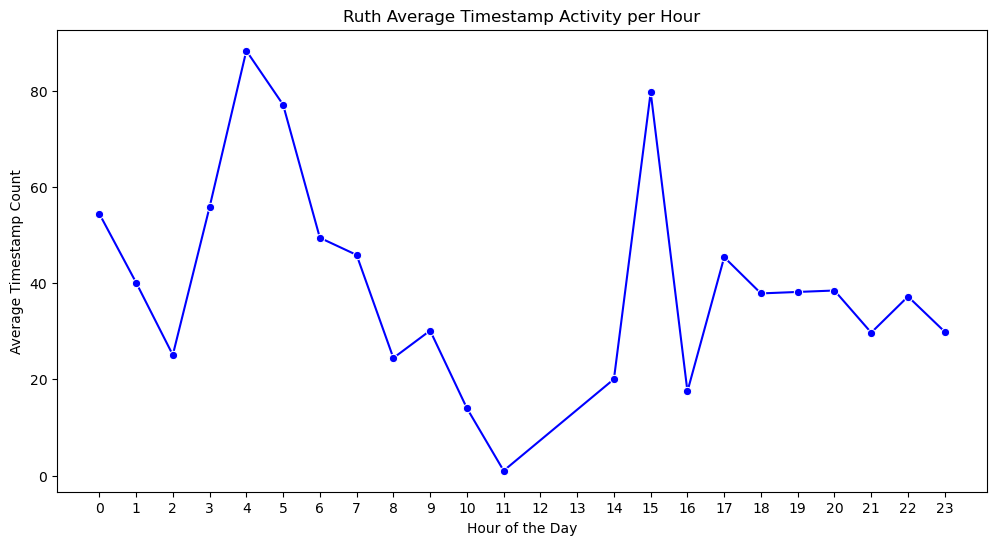

In [24]:
# Visualize ts average activity trend per hour
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="ts_count_per_hour", data=hourly_mean, marker='o', color='b')
plt.title("Ruth Average Timestamp Activity per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Timestamp Count")
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()

We can observe that Ruth has an average peak timestamp activity at 4 am in the morning with the second highest at 3 pm in the afternoon. It seems that 11 am is the least timestamp activity. There seems to be an unexpected timestamp activity happening at a very different hour of the day.

#### V. What is the source of this data? 
Initially, examining the dataset I thought it could be something related to browsing history as that would explain the amount of data. The visualizations ended up changing my overall opinion as follows:
- Timestamp/month = supported my initial guess as it seems september is when the fall semester starts picking up, which tend to be the busiest months as students are readjusting to the semester after a long summer break and might browse for school work or getting neccessities.
- Timestamp/day of week = supported my initial guess even more as it seems the middle of the week is when students tend to browse more since there are more homeworks due or school work.
- Average timestamp/hour = this visualization made me question my guess because it happens at a very weird time of the day. I know a lot of students pull all-nighters for school work, but I don't believe it would be something that goes on as regularly especially looking at the highest activity at 4 am.
I believe location data and some sort of google calendars or schedule data could help deduce this a lot. Location could point me to where Ruth's location is during peak activity and schedule data could help me figure out what her typical schedule is during some of the interesting data points.


For the days that Ruth has the most timestamps, I think it's interesting that it was also a Wednesday which is the day of the week witht he most recorded timestamp data. I checked 6 September 2023 on the Whitman Events and general public news but there doesn't seem to be much happening. I think location data here and social media data could help a lot as there's a potential ruth made some social media updates or was in a certain location like maybe the library to conduct the browsings. Whereas for the month 9 that Ruth has most timestamps, I think the schedule data and possibly walking tracker data could help figure out why there's a lot of timestamp on this day. If the data is actually browshing history, then there should definitely be less walking data as it's high chance that Ruth stayed in one place to conduct browsing.

## Part "2.5-3.0": Taking Ruth's Analyzation on My Data

In [25]:
# Taken from Ruth's code but changed variable name and edited slightly

audrey = pd.read_csv("audrey_timestamps.csv")
audrey["endTime"] = pd.to_datetime(audrey["endTime"])
audrey.sort_values(by="endTime")
audrey

,Unnamed: 0,endTime
0,0,2022-10-18 01:12:00
1,1,2022-10-18 01:15:00
2,2,2022-10-18 01:19:00
3,3,2022-10-18 01:23:00
4,4,2022-10-18 16:58:00
...,...,...
19954,19954,2023-10-18 19:42:00
19955,19955,2023-10-18 19:42:00
19956,19956,2023-10-18 19:45:00
19957,19957,2023-10-18 19:48:00


In [26]:
audrey['end_diff'] = audrey['endTime'].diff()
audrey

,Unnamed: 0,endTime,end_diff
0,0,2022-10-18 01:12:00,NaT
1,1,2022-10-18 01:15:00,0 days 00:03:00
2,2,2022-10-18 01:19:00,0 days 00:04:00
3,3,2022-10-18 01:23:00,0 days 00:04:00
4,4,2022-10-18 16:58:00,0 days 15:35:00
...,...,...,...
19954,19954,2023-10-18 19:42:00,0 days 00:02:00
19955,19955,2023-10-18 19:42:00,0 days 00:00:00
19956,19956,2023-10-18 19:45:00,0 days 00:03:00
19957,19957,2023-10-18 19:48:00,0 days 00:03:00


In [27]:
audrey['end_diff'].max() #longest time between timestamps

Timedelta('11 days 04:15:00')

In [28]:
audrey['end_diff'].mean() #average time between timestamps

Timedelta('0 days 00:26:23.485319170')

For Audrey, the longest time between timestamps is 11 days and the average between two timestamps is 26 minutes 23 seconds 

In [29]:
audrey["date"]=pd.DatetimeIndex(audrey["endTime"]).date
audrey["date"].value_counts()

date
2023-04-19    406
2023-02-18    343
2023-09-02    323
2023-05-12    264
2023-01-22    226
             ... 
2022-11-24      1
2023-08-10      1
2023-10-03      1
2022-11-18      1
2023-08-21      1
Name: count, Length: 300, dtype: int64

In [30]:
#checking the frequency of the time spent on the app through the dates
audrey['date']=audrey['endTime'].dt.date
audrey['month_year'] = pd.to_datetime(audrey['date']).dt.strftime('%m-%Y')
audrey['frequency_month'] = audrey['month_year'].map(audrey['month_year'].value_counts())
audrey['frequency_date'] = audrey['date'].map(audrey['date'].value_counts())
audrey['frequency_date'].max()

406

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Audrey's TimeStamp Data")

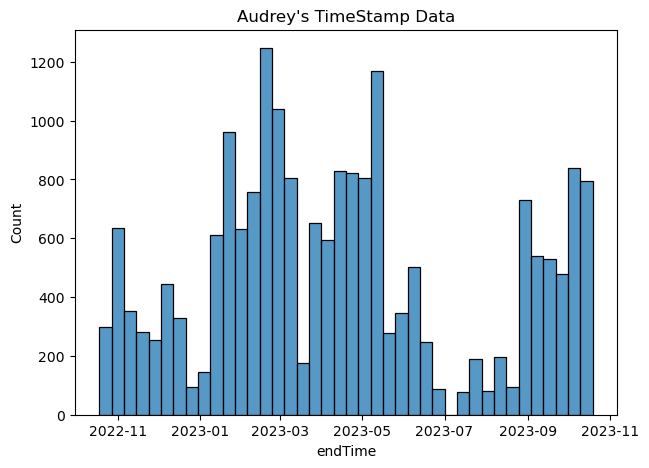

In [31]:
plt.figure(figsize=(7, 5))
sns.histplot(data=audrey["endTime"])
plt.title("Audrey's TimeStamp Data")

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '10-2022'),
  Text(1, 0, '11-2022'),
  Text(2, 0, '12-2022'),
  Text(3, 0, '01-2023'),
  Text(4, 0, '02-2023'),
  Text(5, 0, '03-2023'),
  Text(6, 0, '04-2023'),
  Text(7, 0, '05-2023'),
  Text(8, 0, '06-2023'),
  Text(9, 0, '07-2023'),
  Text(10, 0, '08-2023'),
  Text(11, 0, '09-2023'),
  Text(12, 0, '10-2023')])

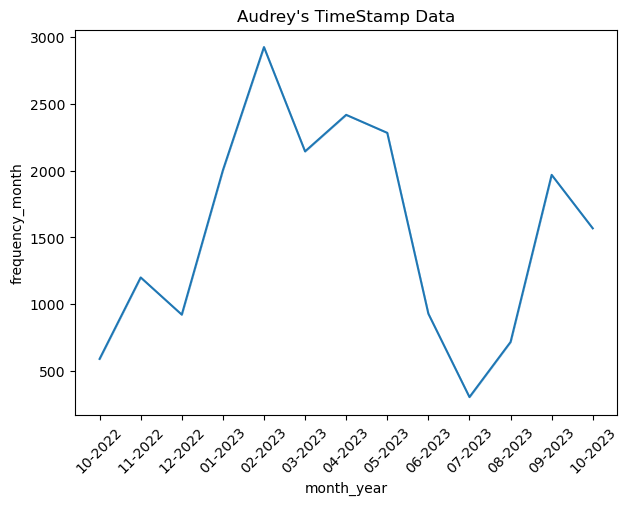

In [32]:
plt.figure(figsize=(7, 5))
sns.lineplot(x="month_year", y="frequency_month", data=audrey)
plt.title("Audrey's TimeStamp Data")
plt.xticks(rotation=45)

## Part 3: Make a combined visualization

#### I. Discussion
We discussed our predictions and turns out my initial guess was not too far off but still completely wrong in a lot of ways. It's interesting that both of our timestamps are Spotify data as well and I would have never guessed considering the original format of timestamp that looked slightly different than my own timestamp data!

_Learn about Partner_

Audrey: I learned that Ruth really loves listening to music and she seems to always have music running! Turns out, Ruth gets very distracted but because the song rhythm it helps Ruth follow what her brain is thinking when working. So, I found that we have this in common that we focus more with music on. I also learned that Ruth is a night owl, she stays up late quite a lot it seems.


Ruth: Audrey was on a trip for 11 days which explains the 11 day longest time without timestamp. I also learned that Audrey likes music maybe not as much as me but we definitely love Spotify.



_Learn about Yourself_

Audrey: I learned about myself that I listen to a lot of songs, but it paled in comparison to Ruth's data. Turns out, i'm still in a more normal level of listening to music.

Ruth: I learned that I should not lose my airpods because I listen to music so much.

#### II. Visualization using both partners' timestamp data

In [33]:
# Perform an inner merge on the 'date' column
df_audrey_ruth = pd.merge(ruth, audrey, on="date", how="inner")
df_audrey_ruth

,Unnamed: 0_x,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month,day_of_week,hour,ts_count_per_hour,Unnamed: 0_y,endTime,end_diff,month_year,frequency_month,frequency_date
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,15219,2023-06-19 04:22:00,0 days 10:49:00,06-2023,927,70
1,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,15220,2023-06-19 04:22:00,0 days 00:00:00,06-2023,927,70
2,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,15221,2023-06-19 04:22:00,0 days 00:00:00,06-2023,927,70
3,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,15222,2023-06-19 04:23:00,0 days 00:01:00,06-2023,927,70
4,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,Monday,2,1,15223,2023-06-19 04:23:00,0 days 00:00:00,06-2023,927,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449561,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,Wednesday,20,2,19954,2023-10-18 19:42:00,0 days 00:02:00,10-2023,1567,70
449562,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,Wednesday,20,2,19955,2023-10-18 19:42:00,0 days 00:00:00,10-2023,1567,70
449563,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,Wednesday,20,2,19956,2023-10-18 19:45:00,0 days 00:03:00,10-2023,1567,70
449564,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,Wednesday,20,2,19957,2023-10-18 19:48:00,0 days 00:03:00,10-2023,1567,70


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

Text(0.5, 1.0, 'Audrey and Ruth Spotify TimeStamp Distribution per Date')

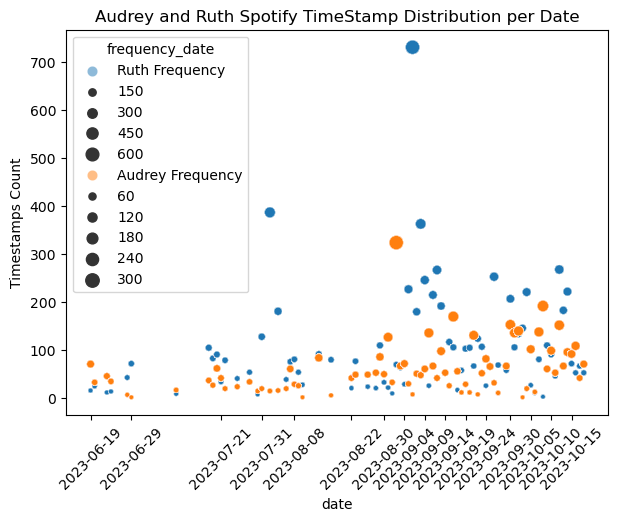

In [34]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="date", y="ts_count_per_date", data=df_audrey_ruth, size="ts_count_per_date", sizes=(10, 100), label="Ruth Frequency", alpha=0.5)
sns.scatterplot(x="date", y="frequency_date", data=df_audrey_ruth, size="frequency_date", sizes=(10, 100), label="Audrey Frequency", alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel("Timestamps Count")

# Selecting a subset of dates for the xticks
unique_dates = df_audrey_ruth["date"].unique()
subset_dates = []
for i, date in enumerate(unique_dates):
    if i % 5 == 0:
        subset_dates.append(date)

# Set x-axis ticks and labels
plt.xticks(ticks=subset_dates, labels=subset_dates)
plt.title("Audrey and Ruth Spotify TimeStamp Distribution per Date")

In [35]:
# Convert ruth data's month format into month-year to match up with my month data
df_audrey_ruth["month"] = pd.to_datetime(df_audrey_ruth["date"]).dt.strftime("%m-%Y")
df_audrey_ruth

,Unnamed: 0_x,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month,day_of_week,hour,ts_count_per_hour,Unnamed: 0_y,endTime,end_diff,month_year,frequency_month,frequency_date
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,Monday,2,1,15219,2023-06-19 04:22:00,0 days 10:49:00,06-2023,927,70
1,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,Monday,2,1,15220,2023-06-19 04:22:00,0 days 00:00:00,06-2023,927,70
2,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,Monday,2,1,15221,2023-06-19 04:22:00,0 days 00:00:00,06-2023,927,70
3,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,Monday,2,1,15222,2023-06-19 04:23:00,0 days 00:01:00,06-2023,927,70
4,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,Monday,2,1,15223,2023-06-19 04:23:00,0 days 00:00:00,06-2023,927,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449561,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10-2023,2852,Wednesday,20,2,19954,2023-10-18 19:42:00,0 days 00:02:00,10-2023,1567,70
449562,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10-2023,2852,Wednesday,20,2,19955,2023-10-18 19:42:00,0 days 00:00:00,10-2023,1567,70
449563,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10-2023,2852,Wednesday,20,2,19956,2023-10-18 19:45:00,0 days 00:03:00,10-2023,1567,70
449564,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10-2023,2852,Wednesday,20,2,19957,2023-10-18 19:48:00,0 days 00:03:00,10-2023,1567,70


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

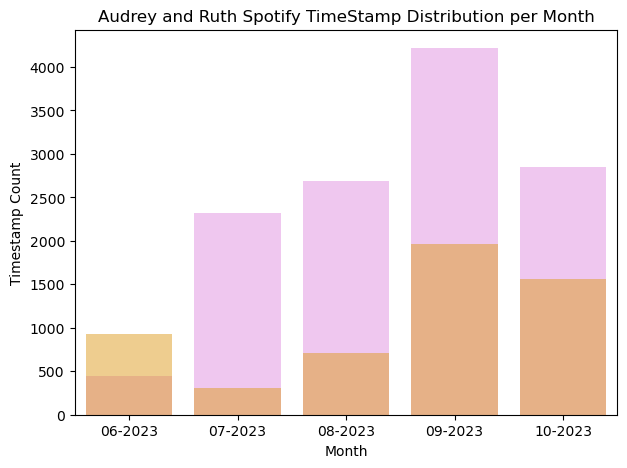

In [36]:
plt.figure(figsize=(7, 5))
sns.barplot(x="month", y="ts_count_per_month", data=df_audrey_ruth, color="violet", alpha=0.5)
sns.barplot(x="month_year", y="frequency_month", data=df_audrey_ruth, color="orange", alpha=0.5)
plt.title("Audrey and Ruth Spotify TimeStamp Distribution per Month")
plt.xlabel("Month")
plt.ylabel("Timestamp Count")
plt.show()

#### III. What do you notice by looking at both partners' data together that you didn't notice looking at the on their own?

## Part 4: Analyze and visualize an additional element from  your personal data

Ok, we are done with the timestamp only part! Now, on your own  do some form of additional analysis of your data (any part of it, not just the timestamps). Your analysis should include:

At least two clear questions that you ask and then (attempt to) answer via data analysis
At least one form of data manipulation (calculating new values, doing a groupby, etc.)
At least one visualization (you can use any tool you like: Observable, Seaborn, Flourish, etc.)
For this portion of the project, do not include your code or your raw data -- that is personal and you can keep it private! You just need to include your results (i.e. findings from your analysis) and your visualization.

In [37]:
# Take the artist and track history 
track_history = spotify_data[["artistName", "trackName", "msPlayed"]]
track_history


,artistName,trackName,msPlayed
0,One Direction,Illusion,194200
1,One Direction,Does He Know?,179413
2,One Direction,Story of My Life,245493
3,One Direction,Story of My Life,245493
4,One Direction,Fireproof,174080
...,...,...,...
9954,Niall Horan,If You Leave Me,42144
9955,Niall Horan,Heaven,65526
9956,Jonah Kagen,broken,195400
9957,Tate McRae,you broke me first,169265


#### I. Which are my top tracks that I listen to most this past year (2022-2023)?

In [38]:
# Find out the total ms played of a track
track_total_ms = track_history.groupby("trackName")["msPlayed"].sum().sort_values(ascending=False).head(10) # get top 10 most total played

# Create a DataFrame to store the results
# Convert ms to minutes by dividing with 60000
df_track_trend = pd.DataFrame({"Top 10 Tracks": track_total_ms.index, "Total Play Duration (minutes)": track_total_ms.values/60000}) 

# Examine
df_track_trend


,Top 10 Tracks,Total Play Duration (minutes)
0,Yêu Được Không,720.769500
1,Keep You Mine,364.405600
2,Safe With Me (with Audrey Mika),356.238867
3,Oceans & Engines,354.571883
4,trời giấu trời mang đi,295.045800
5,she's all i wanna be,272.873733
6,Em Gái Mưa,271.787300
7,Fast Lane,267.759533
8,Ánh Nắng Của Anh - Chờ Em Đến Ngày Mai Origina...,257.201183
9,There For You,239.681367


##### What's the average playing duration of the top songs I listen to?

In [39]:
# Find out the average ms played of a track
track_avg_duration = track_history.groupby("trackName")["msPlayed"].mean()
df_track_trend["Average Play Duration (minutes)"] = track_avg_duration.loc[track_total_ms.index].values/60000

# Examine
df_track_trend

,Top 10 Tracks,Total Play Duration (minutes),Average Play Duration (minutes)
0,Yêu Được Không,720.769500,9.740128
1,Keep You Mine,364.405600,2.892108
2,Safe With Me (with Audrey Mika),356.238867,3.180704
3,Oceans & Engines,354.571883,5.540186
4,trời giấu trời mang đi,295.045800,4.041723
5,she's all i wanna be,272.873733,3.327728
6,Em Gái Mưa,271.787300,4.529788
7,Fast Lane,267.759533,2.502426
8,Ánh Nắng Của Anh - Chờ Em Đến Ngày Mai Origina...,257.201183,4.592878
9,There For You,239.681367,3.524726


#### II. Who are my favorite artists this past year (2022-2023)?

In [40]:
# Find out the total artist appearance
artist_play_counts = track_history.groupby("artistName")["msPlayed"].count().sort_values(ascending=False).head(10)

# Create a DataFrame to store the results
df_top_artists = pd.DataFrame({"Top 10 Artists": artist_play_counts.index, "Total Play Counts": artist_play_counts.values}) 

# Examine
df_top_artists


,Top 10 Artists,Total Play Counts
0,ILLENIUM,652
1,Taylor Swift,543
2,Jamie Miller,441
3,Gryffin,371
4,NIKI,369
5,Đức Phúc,349
6,MAMAMOO,300
7,NOTD,242
8,AMEE,191
9,One Direction,177


##### How long did I listen to this artist as a whole? How many songs in total did I listen to from the artist?

In [41]:
# Find out the total ms played of an artist
artist_total_duration = track_history.groupby("artistName")["msPlayed"].sum()
df_top_artists["Total Play Duration (minutes)"] = artist_total_duration.loc[artist_play_counts.index].values/60000

# Find out the unique tracks of the artist present
artist_track_count = track_history.groupby("artistName")["trackName"].nunique()
df_top_artists["Track Present"] = artist_track_count.loc[artist_play_counts.index].values

# Examine
df_top_artists

,Top 10 Artists,Total Play Counts,Total Play Duration (minutes),Track Present
0,ILLENIUM,652,2026.884183,70
1,Taylor Swift,543,1907.420300,131
2,Jamie Miller,441,1260.882233,16
3,Gryffin,371,1233.904533,10
4,NIKI,369,1441.122100,36
5,Đức Phúc,349,1751.279950,12
6,MAMAMOO,300,893.853783,53
7,NOTD,242,664.992483,6
8,AMEE,191,683.295517,9
9,One Direction,177,557.382483,73


In [48]:
# Export dataframe using .to_csv
df_track_trend.to_csv("audrey_top_tracks_22_23.csv")
df_top_artists.to_csv("audrey_top_artists_22_23.csv")